#Problem Statement and Basic Analysis

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

1. Product Purchased:	KP281, KP481, or KP781
2. Age:	In years
3. Gender:	Male/Female
4. Education:	In years
5. MaritalStatus:	Single or partnered
6. Usage:	The average number of times the customer plans to use the treadmill each week.
7. Income:	Annual income (in $)
8. Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
9. Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

1. The KP281 is an entry-level treadmill that sells for $$1,500
2. The KP481 is for mid-level runners that sell for
$1,750
3. The KP781 treadmill is having advanced features that sell for $2,500.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
data = pd.read_csv('aerofit_treadmill.csv')

In [3]:
rows, columns = data.shape
print('Number of rows: ', rows)
print('Number of columns: ', columns)

Number of rows:  180
Number of columns:  9


In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
data.isna().sum(axis = 0)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
for col in data.columns:
  if data[col].dtype == object or col in ('Education', 'Usage', 'Fitness'):
    print(col, '\n', data[col].value_counts(), '\n')

Product 
 KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 

Gender 
 Male      104
Female     76
Name: Gender, dtype: int64 

Education 
 16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64 

MaritalStatus 
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 

Usage 
 3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64 

Fitness 
 3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64 



##Observations:
1. Shape of the data: There are 9 variables and 180 rows.
2. Categorical variables: 'Product', 'Gender', 'MaritalStatus' are of data type object with class 'str'.
3. Continuous variables: 'Age', 'Education', 'Income', 'Usage', 'Miles', 'Fitness' are of data type int.
4. There are no missing values present in the dataset.
5. Unique Values:
* 'Product' variable :
>* 3 unique values: 'KP281', 'KP481' and 'KP781'
>* most data rows for value 'KP281'

* 'Gender' variable :
>* 2 unique values: 'Male' and 'Female'
>* most data rows for value 'Male'

* 'MaritalStatus' variable :
>* 2 unique values: 'Partnered' and 'Single'
>* most data rows for value 'Partnered'

* 'Education' variable :
>* 8 unique values
>* most data rows for value 16

* 'Usage' variable :
>* 6 unique values
>* most data rows for value 3

* 'Fitness' variable :
>* 5 unique values [1-5]
>* most data rows for value 3








#Descriptive Analysis

In [8]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
#Calculating few more statistical measures such as 'Range', 'IQR', 'Lower Whisker' and 'Upper Whisker'
descriptive_stats = data.describe()
descriptive_stats = descriptive_stats.reindex(descriptive_stats.index.values.tolist()+['Range', 'IQR', 'Lower Whisker', 'Upper Whisker'])

for col in descriptive_stats.columns:
  descriptive_stats.loc['Range'][col] = descriptive_stats.loc['max'][col] - descriptive_stats.loc['min'][col]
  descriptive_stats.loc['IQR'][col] = descriptive_stats.loc['75%'][col] - descriptive_stats.loc['25%'][col]
  descriptive_stats.loc['Lower Whisker'][col] = descriptive_stats.loc['25%'][col] - (1.5 * descriptive_stats.loc['IQR'][col])
  descriptive_stats.loc['Upper Whisker'][col] = descriptive_stats.loc['75%'][col] + (1.5 * descriptive_stats.loc['IQR'][col])

descriptive_stats

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000
Range,32.000000,9.000000,5.000000,4.000000,75019.000000,339.000000
IQR,9.000000,2.000000,1.000000,1.000000,14609.250000,48.750000


##Observations:

1. Customers' age data is in the range [18, 50] with median age 26.
2. Customers' education data is in the range [12, 21] with median education 16.
3. Customers' treadmill usage data is in the range [2, 7] with median value 3.
4. Customers' fitness data is in the range [1, 5] with median value 3.
5. '**KP281**' is the most frequest product purchased.
6. Male customers buy the treadmill more often than the female customers.
7. Partnered customers purchase the treadmill more frequently than the single customers.
8. Standard Deviation is high for attributes '**Income**' and '**Miles**' as compared to others which means there are more number of **outliers** present in these two columns.

#Outlier Detection using non-graphical approach
To detect the number of outliers present in the dataset, we have counted the no of values which are either lower than the lower whisker or greater than the upper whisker.
>Formula:
>* Lower Whisker = Q1 - (1.5 * IQR)
>* Upper Whisker = Q3 + (1.5 * IQR)


In [10]:
for col in descriptive_stats.columns:
  print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count())

Age : 5
Education : 4
Usage : 9
Fitness : 2
Income : 19
Miles : 13


##Observations:
1. We can see that there are very few outliers present for the attributes: 'Age', 'Education', 'Usage' and 'Fitness'

2. There are many outliers present for the attributes: 'Income' and 'Miles'

#Univariate Analysis: continuous variables

Understandig the distribution of data for the following continuous variables:

1. Age
2. Education
3. Income
4. Usage
5. Miles
6. Fitness

##Using Box-Plots:

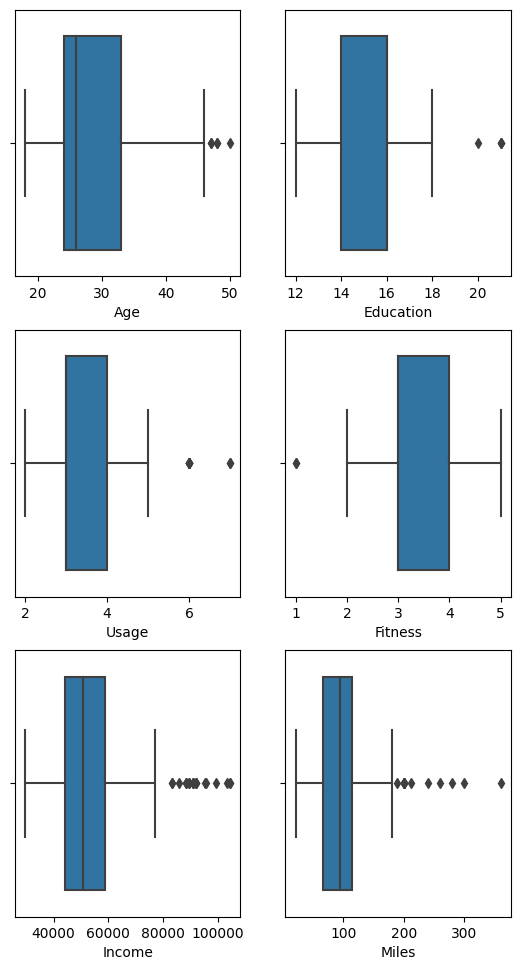

In [11]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.boxplot(data = data, x = col, orient = 'h')
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

###Observations:
1. We can see that there are more outliers present for the attributes 'Income' and 'Miles'.
2. There are very few outliers present for the attributes 'Age', 'Education', 'Usage' and 'Fitness'.
3. Median income is around $$50,000 which means 50% of the values present in the column are <= $50,000.
Also, the upper whisker is around $80,000 and we can see that there are many values greater than that which are nothing but the outliers.
4. The median value for miles attribute is around 100.
And, upper whisker is a bit lesser than 200 and there are quite a significant number of values greater than that which are the outliers.
5. For 'Age', 'Education' and 'Usage' attributes, there are very few values greater than the upper whisker similarly for 'Fitness' very few are lesser than the lower whisker. So, overall very few outliers present for these 4 columns.


##Using Histplots:

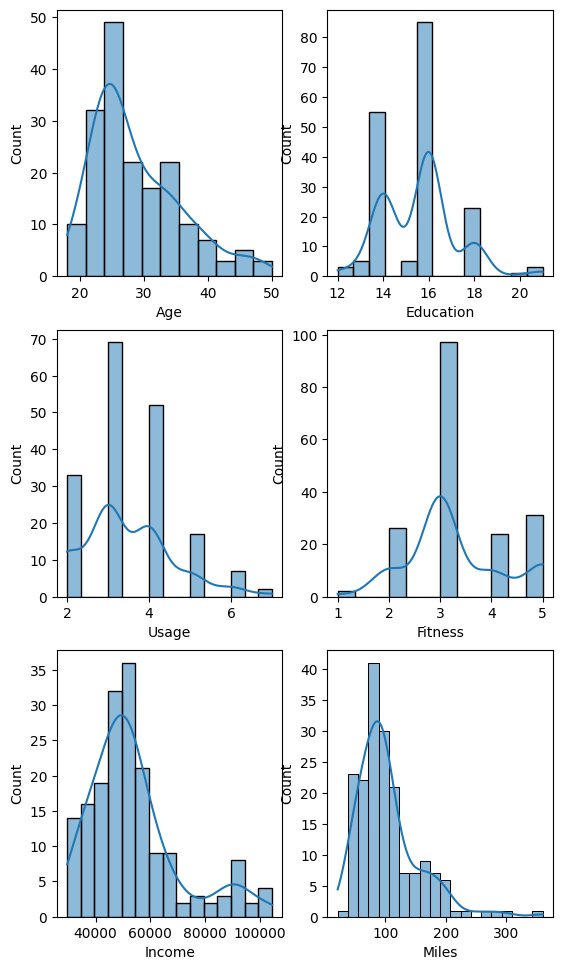

In [12]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.histplot(data = data, x = col, kde = True)
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

###Observations:
1. Most of the customers are in the age bracket [20, 30].
2. Most of the customers are having the education of 14 or 16 years.
3. Most of the customers are using the treadmill 3-4 times a week.
4. Most of the customers are having self-rated fitness level as 3 which means decently fit.
5. Most of the customers earn 40k-60k dollars a year.
6. Most of the customers plan to walk/run 100 miles a week.

#Univariate Analysis: categorical variables

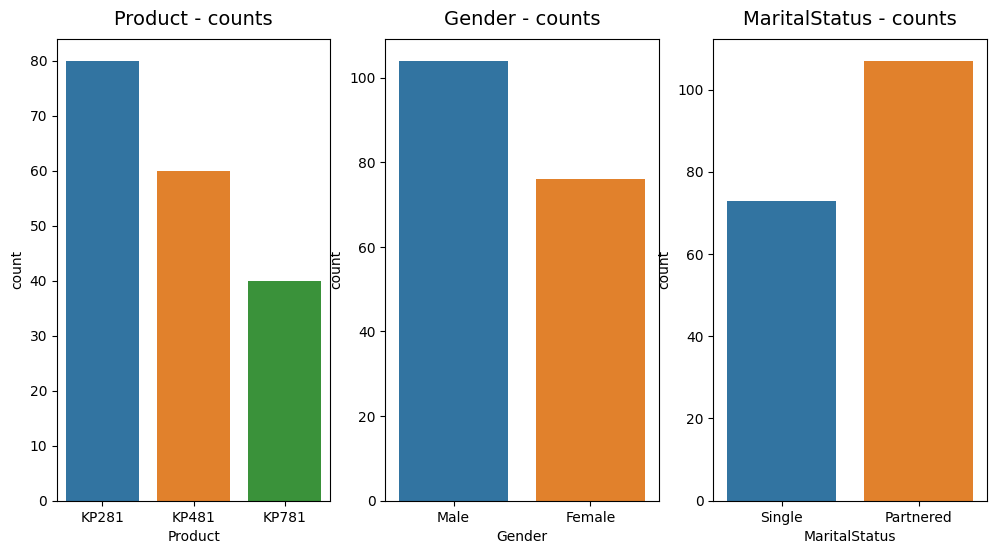

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
sns.countplot(data = data, x = 'Product', ax = axes[0])
sns.countplot(data = data, x = 'Gender', ax = axes[1])
sns.countplot(data = data, x = 'MaritalStatus', ax = axes[2])

axes[0].set_title("Product - counts", pad=10, fontsize=14)
axes[1].set_title("Gender - counts", pad=10, fontsize=14)
axes[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)

plt.show()

##Observations:
1. Treadmill product 'KP281' is the most frequently purchased followed by 'KP481' and then 'KP781' being the least purchased.
2. Customer data has more males than the females.
3. There are more data-points for partnered customers than the single ones.

#Bivariate Analysis: categorical variables

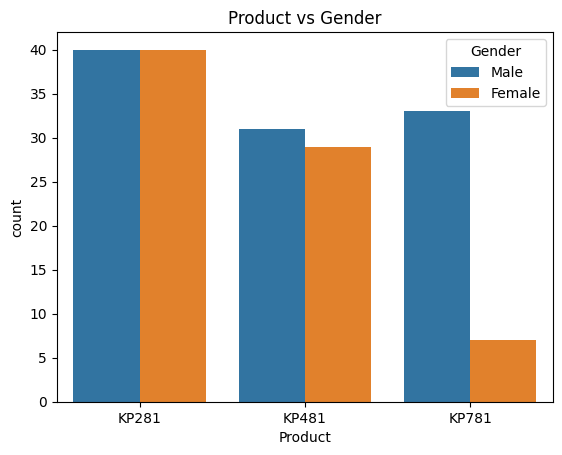

In [41]:
sns.countplot(data = data, x = 'Product', hue = 'Gender')
plt.title('Product vs Gender')
plt.show()

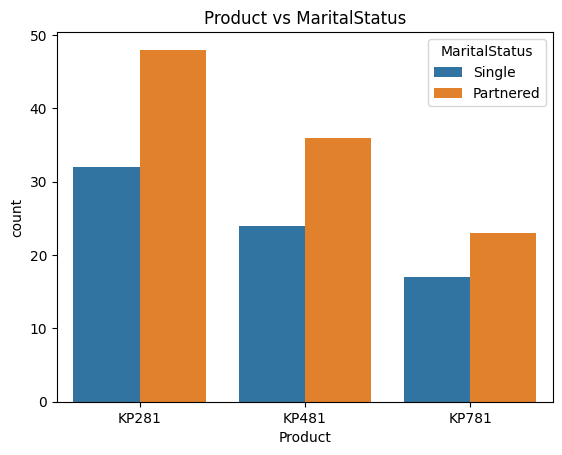

In [42]:
sns.countplot(data = data, x = 'Product', hue = 'MaritalStatus')
plt.title('Product vs MaritalStatus')
plt.show()

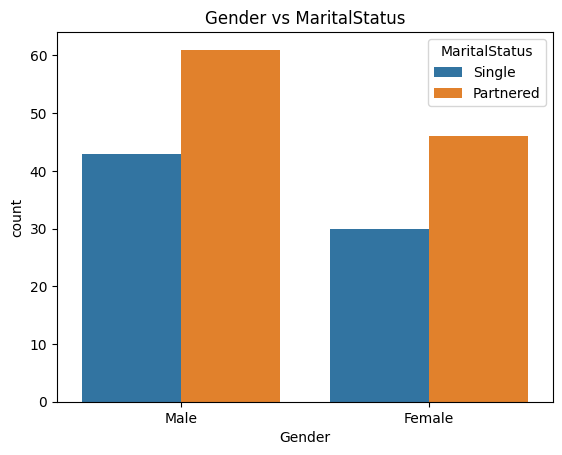

In [43]:
sns.countplot(data = data, x = 'Gender', hue = 'MaritalStatus')
plt.title('Gender vs MaritalStatus')
plt.show()

##Observations:
1. Among the customers who purchased 'KP281', the distribution of gender is equal.
2. Among the customers who purchased 'KP481', there are slightly more males than the females.
3. We can see that there are significantly higher number of males than the females who have purchased 'KP781'.
4. For all the 3 products, partnered customers have purchased the product more often than the single ones.

#Bivariate Analysis: Product vs continuous variables

##Using Boxplots:

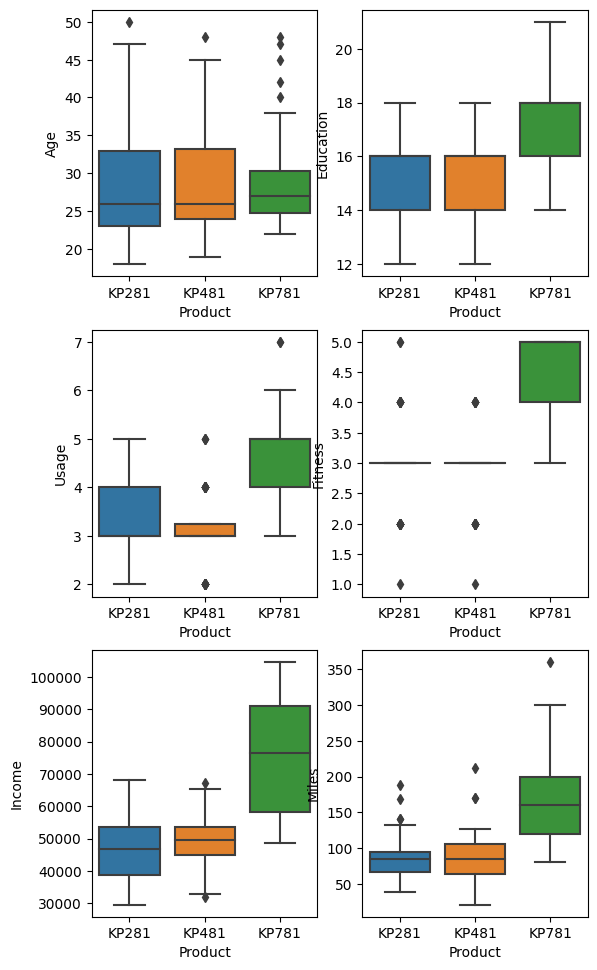

In [17]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.boxplot(data = data, x = 'Product', y = col, orient = 'v')
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

###Observations:
1. The customers who have purchases the product 'KP781' are the ones with higher value for median income, usage, miles and fitness as compared to the customer base of other products.
2. The median values for all the continuous attributes are almost closer for both 'KP281' and 'KP481'.
3. Education is also quite higher for the customers who have purchased 'KP781'.
4. There are significantly higher no of outliers present in the age attribute among the customers with 'KP781' product.

##Using Histplots:

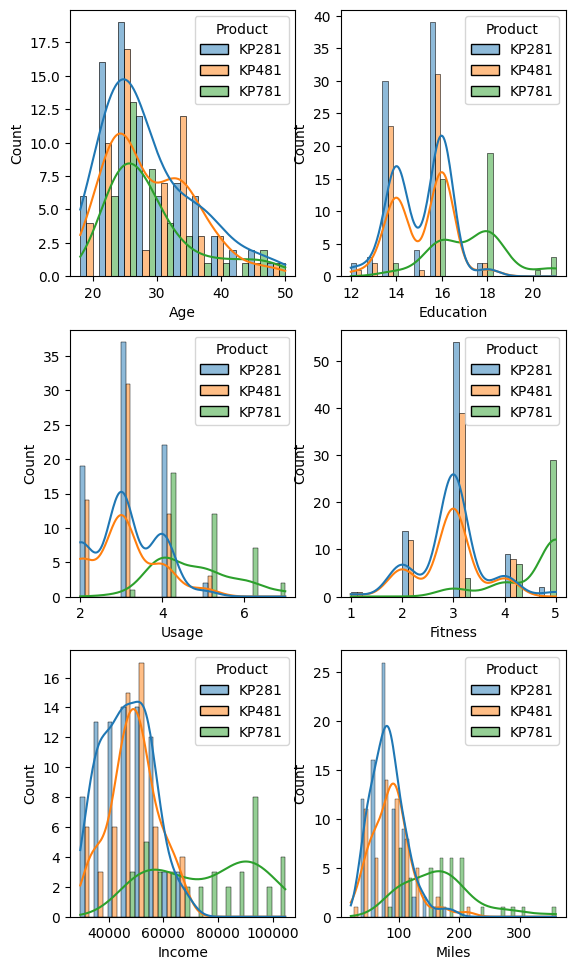

In [18]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.histplot(data = data, hue = 'Product', x = col, kde = True, multiple = 'dodge')
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

###Observations:
1. 'KP781' product is mostly purchased by the customers with the highest level of fitness, who are willing to walk/run > 200 miles, use it more than 3 times a week.
2. It is unlikely that the customer with income lesser than 45k dollars would buy the 'KP781' treadmill.


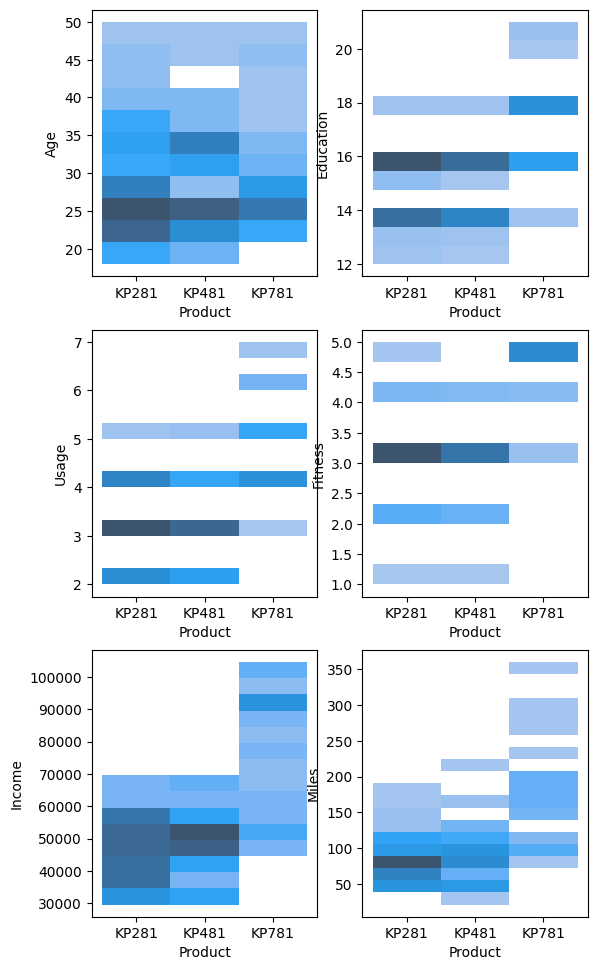

In [19]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.histplot(data = data, x = 'Product', y = col)
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

###Observations:
1. **Product vs Age**: For all the 3 products, highest no of customers are 25 years old.
2. **Product vs Fitness**: For product 'KP781', most people have fitness level as 5 where as for the other two products, it's 3.
3. **Product vs Usage**: For product 'KP781', most people use the treadmill 4 times a week whereas for other two products, it's 3 times a week.
5. **Product vs Education**: For product 'KP781', education of most people is 18 years where as for other two products it's 16 years.
6. **Product vs Income**: For product 'KP781', most people are having their income in the range of 90k-100k whereas for the rest two products it's in the range of 50k-60k.
7. **Product vs Miles**: For product 'KP781', the miles that most people plan to walk/run per week are in the range 150-200 whereas for the other two products, it's in the range of 50-100.

#Bivariate Analysis: continuous variables

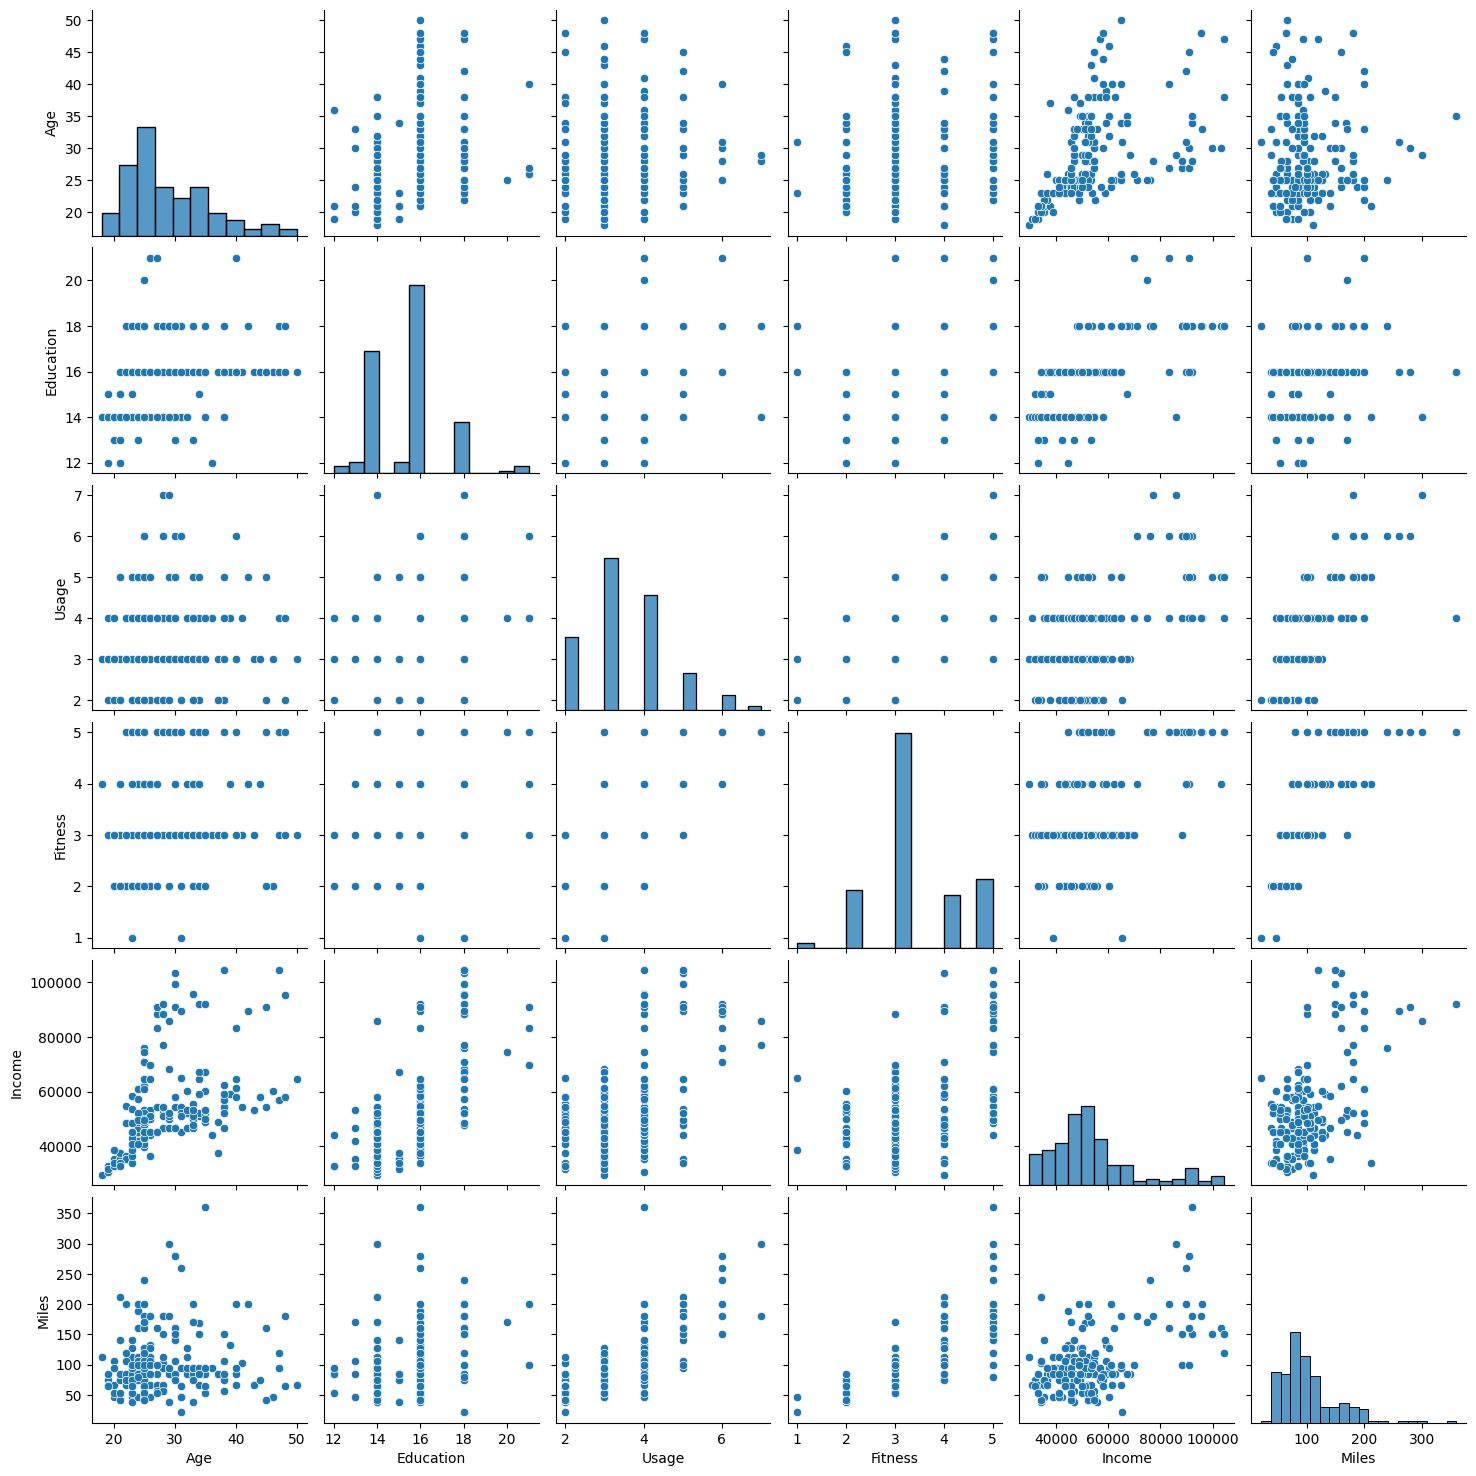

In [44]:
sns.pairplot(data)
plt.show()

<ipython-input-45-a7202cd66020>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


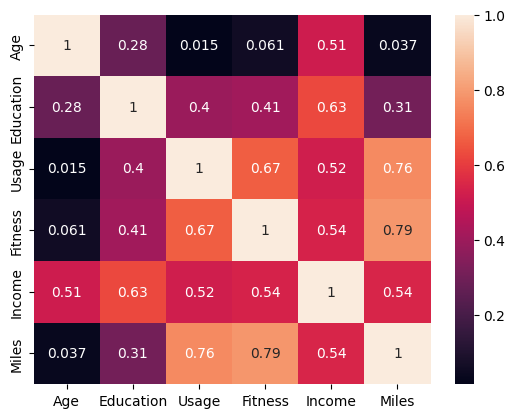

In [45]:
sns.heatmap(data.corr(), annot = True)
plt.show()

##Observations:
1. The correlation factor among the variables **'Miles' and 'Fitness'** is **+0.79** and it's the highest among all the pairs which means that fitness significantly increases with the increase in the number of miles.
2. Also, **'Usage' and 'Miles'** have quite high correlation factor which is **+0.76** which means as usage increases, miles also increase.
3. **'Age' and 'Fitness'** have the **least +ve correlation 0.015** which means that fitness is increasing with age but very few data points are following that.

#Multivariate Analysis

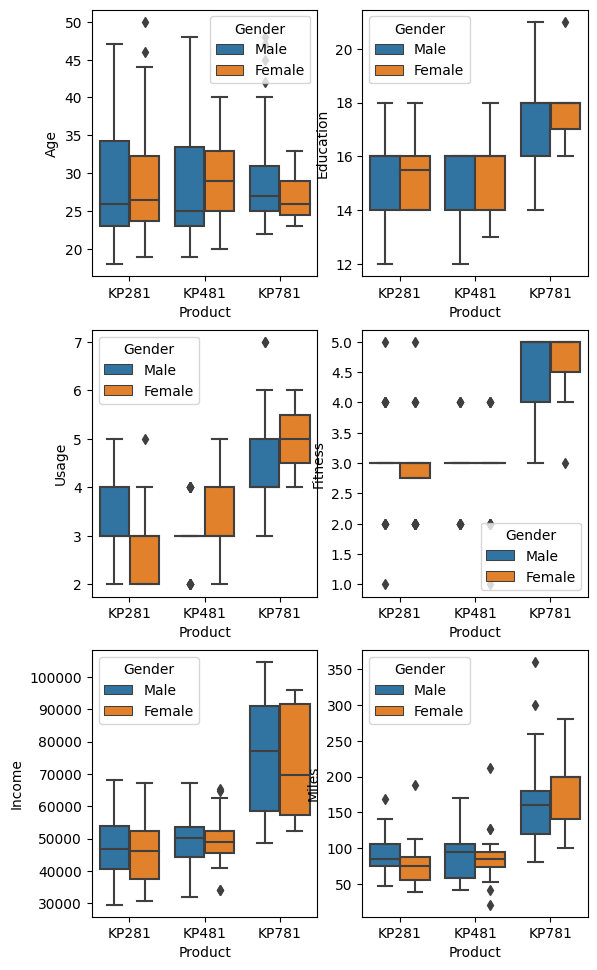

In [22]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.boxplot(data = data, x = 'Product', y = col, hue = 'Gender', orient = 'v')
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

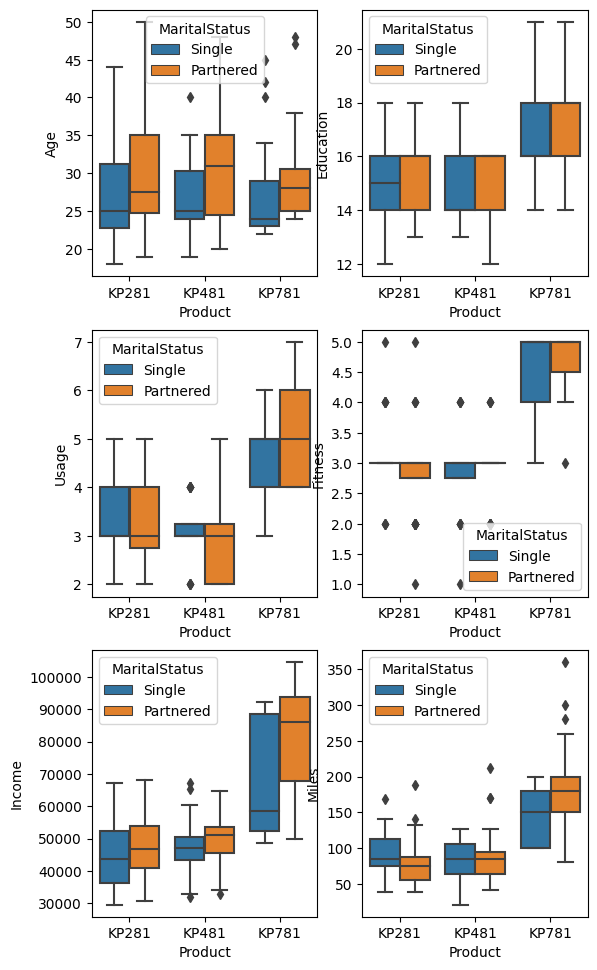

In [23]:
i = 1
for col in data.columns:
  if data[col].dtype == int:
    plt.subplot(3, 2, i)
    sns.boxplot(data = data, x = 'Product', y = col, hue = 'MaritalStatus', orient = 'v')
    i += 1

plt.subplots_adjust(top = 2.0)
plt.show()

##Observations:
1. For 'KP481', median age of females buying the product is quite higher than the males.
2. For each product, male customers have higher median income than the females but for 'KP781' this difference is quite high.
3. Among the buyers of each product, partenered customers are significantly older than the single ones.
4. For each product, partnered customers have higher median income than the single ones but for 'KP781' this difference is quite high.


#Marginal Probabilities

In [24]:
data['Product'].value_counts(normalize = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [25]:
data['Gender'].value_counts(normalize = True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [26]:
data['MaritalStatus'].value_counts(normalize = True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [48]:
data['Fitness'].value_counts(normalize = True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [28]:
data['Usage'].value_counts(normalize = True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

#Conditional Probabilities

In [29]:
cond_prob_data = pd.crosstab(index = data['Product'], columns = data['Gender'], normalize = 'columns')

for row in cond_prob_data.index:
  for col in cond_prob_data.columns:
    print('P(' , row , '|' , col , ') = ' , cond_prob_data.loc[row][col])
  print('\n')

P( KP281 | Female ) =  0.5263157894736842
P( KP281 | Male ) =  0.38461538461538464


P( KP481 | Female ) =  0.3815789473684211
P( KP481 | Male ) =  0.2980769230769231


P( KP781 | Female ) =  0.09210526315789473
P( KP781 | Male ) =  0.3173076923076923




In [30]:
cond_prob_data = pd.crosstab(index = data['Product'], columns = data['MaritalStatus'], normalize = 'columns')

for row in cond_prob_data.index:
  for col in cond_prob_data.columns:
    print('P(' , row , '|' , col , ') = ' , cond_prob_data.loc[row][col])
  print('\n')

P( KP281 | Partnered ) =  0.4485981308411215
P( KP281 | Single ) =  0.4383561643835616


P( KP481 | Partnered ) =  0.3364485981308411
P( KP481 | Single ) =  0.3287671232876712


P( KP781 | Partnered ) =  0.21495327102803738
P( KP781 | Single ) =  0.2328767123287671




In [31]:
cond_prob_data = pd.crosstab(index = data['Product'], columns = [data['Gender'], data['MaritalStatus']], normalize = 'columns')

for row in cond_prob_data.index:
  for col in cond_prob_data.columns:
    print('P(' , row , '|' , col , ') = ' , cond_prob_data.loc[row][col])
  print('\n')

P( KP281 | ('Female', 'Partnered') ) =  0.5869565217391305
P( KP281 | ('Female', 'Single') ) =  0.43333333333333335
P( KP281 | ('Male', 'Partnered') ) =  0.3442622950819672
P( KP281 | ('Male', 'Single') ) =  0.4418604651162791


P( KP481 | ('Female', 'Partnered') ) =  0.32608695652173914
P( KP481 | ('Female', 'Single') ) =  0.4666666666666667
P( KP481 | ('Male', 'Partnered') ) =  0.3442622950819672
P( KP481 | ('Male', 'Single') ) =  0.23255813953488372


P( KP781 | ('Female', 'Partnered') ) =  0.08695652173913043
P( KP781 | ('Female', 'Single') ) =  0.1
P( KP781 | ('Male', 'Partnered') ) =  0.3114754098360656
P( KP781 | ('Male', 'Single') ) =  0.32558139534883723




In [36]:
#removing the outliers from fitness data to get the conditional probabilities
fitness_data = data[(data['Fitness'] >= descriptive_stats.loc['Lower Whisker']['Fitness']) & (data['Fitness'] <= descriptive_stats.loc['Upper Whisker']['Fitness'])][['Product', 'Fitness']]
#fitness_data.count()

cond_prob_data = pd.crosstab(index = fitness_data['Product'], columns = fitness_data['Fitness'], normalize = 'columns')

for row in cond_prob_data.index:
  for col in cond_prob_data.columns:
    print('P(' , row , '|' , col , ') = ' , cond_prob_data.loc[row][col])
  print('\n')

P( KP281 | 2 ) =  0.5384615384615384
P( KP281 | 3 ) =  0.5567010309278351
P( KP281 | 4 ) =  0.375
P( KP281 | 5 ) =  0.06451612903225806


P( KP481 | 2 ) =  0.46153846153846156
P( KP481 | 3 ) =  0.4020618556701031
P( KP481 | 4 ) =  0.3333333333333333
P( KP481 | 5 ) =  0.0


P( KP781 | 2 ) =  0.0
P( KP781 | 3 ) =  0.041237113402061855
P( KP781 | 4 ) =  0.2916666666666667
P( KP781 | 5 ) =  0.9354838709677419




In [38]:
#removing the outliers from usage data to get the conditional probabilities
usage_data = data[(data['Usage'] >= descriptive_stats.loc['Lower Whisker']['Usage']) & (data['Usage'] <= descriptive_stats.loc['Upper Whisker']['Usage'])][['Product', 'Usage']]
#usage_data.count()

cond_prob_data = pd.crosstab(index = usage_data['Product'], columns = usage_data['Usage'], normalize = 'columns')

for row in cond_prob_data.index:
  for col in cond_prob_data.columns:
    print('P(' , row , '|' , col , ') = ' , cond_prob_data.loc[row][col])
  print('\n')

P( KP281 | 2 ) =  0.5757575757575758
P( KP281 | 3 ) =  0.5362318840579711
P( KP281 | 4 ) =  0.4230769230769231
P( KP281 | 5 ) =  0.11764705882352941


P( KP481 | 2 ) =  0.42424242424242425
P( KP481 | 3 ) =  0.4492753623188406
P( KP481 | 4 ) =  0.23076923076923078
P( KP481 | 5 ) =  0.17647058823529413


P( KP781 | 2 ) =  0.0
P( KP781 | 3 ) =  0.014492753623188406
P( KP781 | 4 ) =  0.34615384615384615
P( KP781 | 5 ) =  0.7058823529411765




#Customer Profiling
#####The following table shows the characteristics of the customers who have purchased that particular product the most so that these type of customers can be targetted while selling that particular product in order to increase the sales:

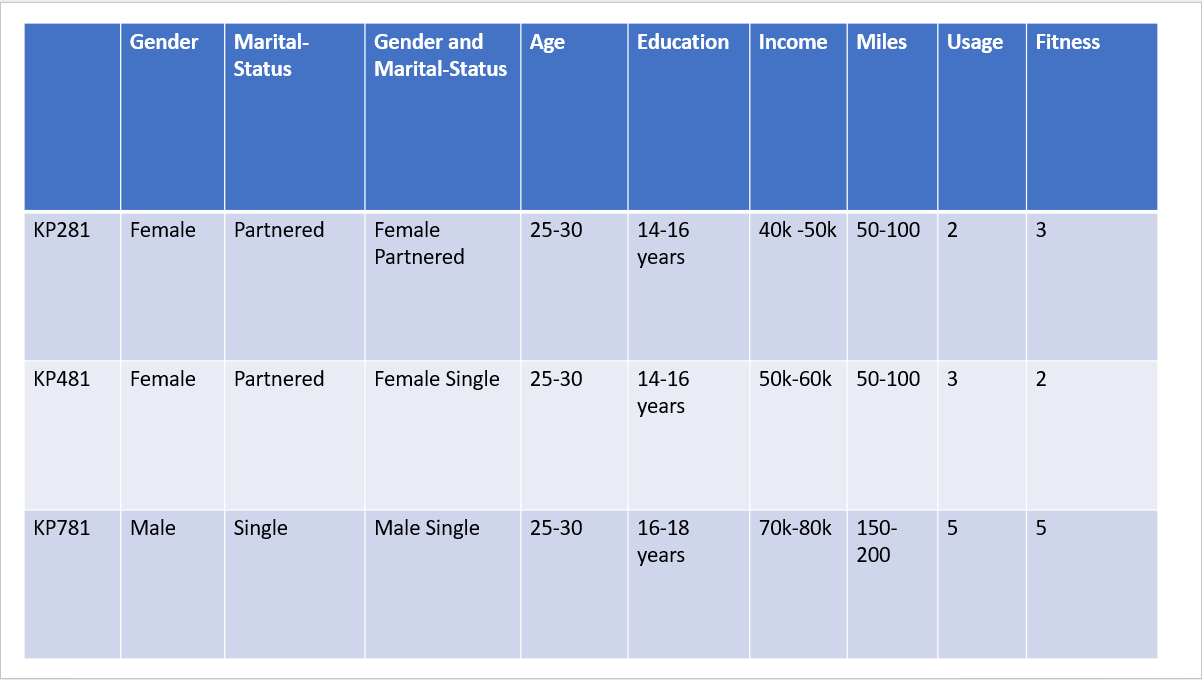

In [52]:
Image(filename='Customer_Profiling.png')

#Recommendations for business:
1. To increase the sales for the product 'KP781', target the customers having highest level of fitness (5/5) that mostly use the treadmill 5 times a week and have the income in the range of $90k-100k.
2. To increase the sales of product 'KP481' and 'KP281', target the customers having moderate fitness that use the treadmill 2-3 times a week and income in the range if $$40k-60k. Better to target the customers with income 50k-60k for 'KP481' purchase.
3. Recommended to target partnered customers for the sales of any product.
4. Recommended to target people with 14-16 years of education for selling products 'KP281' and 'KP481'as they tend to be the major customers and customers with 16-18 years of education for 'KP781'.
5. Recommended to target customers that plan to run 150-200 miles a week for the sales of 'KP781' and those with 50-100 for sales of other two products.
6. Recommended to target male customers for the sales of 'KP781'.
7. Recommended to target the customers in the age range 25-30 for the sales of any product.

